# Questão 2

Conforme Géron (2019), conjuntos de dados de alta dimensão correm o risco de serem muito esparsos, o que significa que as instâncias de treinamento podem estar distantes umas das outras. Isso pode resultar em novas instâncias também estando longe de qualquer instância de treinamento, tornando a generalização do modelo menos confiável e aumentando o risco de overfitting. Para evitar isso, uma técnica comum é a redução de dimensionalidade, que permite reduzir o número de recursos do modelo.

Um método comum de redução de dimensionalidade é a Análise de Componentes Principais, ou PCA (Principal Component Analysis), que identifica o hiperplano mais próximo dos dados e projeta os dados nesse hiperplano. O PCA funciona encontrando os autovalores e autovetores da matriz de covariância ou da matriz de correlação dos dados. Os autovetores representam a direção do eixo principal dos dados, enquanto os autovalores indicam a magnitude da variação dos dados nessa direção. A matriz de covariância é usada quando as unidades dos recursos são diferentes, enquanto a matriz de correlação é usada quando as unidades são as mesmas.

Por exemplo, se tivermos um conjunto de dados com muitas variáveis, podemos aplicar o PCA para reduzir o número de variáveis para as mais relevantes. Usando o PCA com a matriz de covariância ou de correlação, podemos identificar as duas variáveis mais importantes que contêm a maior parte das informações e projetar os dados nesse espaço reduzido, mantendo a maioria das informações dos dados originais. Isso nos permite visualizar os dados em um espaço bidimensional e entender melhor as relações entre as variáveis.

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sympy.printing.pretty.pretty import pretty_print as pprint
from IPython.display import display
import sympy as sp

In [27]:
# carrega o dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                 header=None, delim_whitespace=True, 
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                        'acceleration', 'model_year', 'origin', 'car_name'])

In [28]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [29]:
# remove as colunas não numéricas e as com valores faltantes
df = df.drop(['car_name'], axis=1)
df = df.replace('?', np.nan) # converte ? para NaN
df = df.dropna()

In [30]:
# separa as variáveis explicativas (X) e a variável de resposta (y)
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [31]:
# padroniza as variáveis explicativas para terem média 0 e desvio padrão igual a 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [39]:
# executa o PCA para reduzir a dimensionalidade dos dados para duas dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [40]:
# mostra a matriz de covariância
print('Matriz de covariância:')
covariance_matrix = sp.Matrix(pca.get_covariance())
display(covariance_matrix)

# exibe autovalores
print('Autovalores:')
eigenvalues_matrix = sp.Matrix(np.diag(pca.explained_variance_))
display(eigenvalues_matrix)

# exibe autovetores
print('Autovetores:')
eigenvectors_matrix = sp.Matrix(pca.components_.T)
display(eigenvectors_matrix)

# mostra a matriz de componentes principais
print('Matriz de componentes principais:')
components_matrix = sp.Matrix(pca.components_)
display(components_matrix)

Matriz de covariância:


Matrix([
[  1.13155695075551,     0.869182351116,  0.819579920464307,  0.835989155823969, -0.527427377976891, -0.357324230097333, -0.609279207476811],
[    0.869182351116,   1.18856624882767,  0.849677980463369,  0.862841506198459, -0.551114194244998, -0.376863528143628, -0.624767375253958],
[ 0.819579920464307,  0.849677980463369,   1.13323619968861,  0.800208254959434, -0.609292809456169, -0.466849522510772, -0.519999191783178],
[ 0.835989155823969,  0.862841506198459,  0.800208254959434,    1.1256761947674, -0.493504251048666, -0.316989153053097, -0.629102484193498],
[-0.527427377976891, -0.551114194244998, -0.609292809456169, -0.493504251048666,  0.826020992206991,  0.479059359163697,  0.223907470590646],
[-0.357324230097333, -0.376863528143628, -0.466849522510772, -0.316989153053097,  0.479059359163697,  0.759337238132554, 0.0621441765648596],
[-0.609279207476811, -0.624767375253958, -0.519999191783178, -0.629102484193498,  0.223907470590646, 0.0621441765648596,  0.853508988920478

Autovalores:


Matrix([
[4.62385468500799,                 0],
[               0, 0.942436485411599]])

Autovetores:


Matrix([
[   0.4381181417349, -0.120213536810794],
[  0.45336562976591, -0.107442761062901],
[ 0.437557452808417,  0.142439908564514],
[  0.43194636353997, -0.202775380742275],
[-0.297707572112013, -0.482185754338571],
[-0.214732809137554, -0.642497799260572],
[-0.299562908807464,  0.517002178267986]])

Matriz de componentes principais:


Matrix([
[   0.4381181417349,   0.45336562976591, 0.437557452808417,   0.43194636353997, -0.297707572112013, -0.214732809137554, -0.299562908807464],
[-0.120213536810794, -0.107442761062901, 0.142439908564514, -0.202775380742275, -0.482185754338571, -0.642497799260572,  0.517002178267986]])

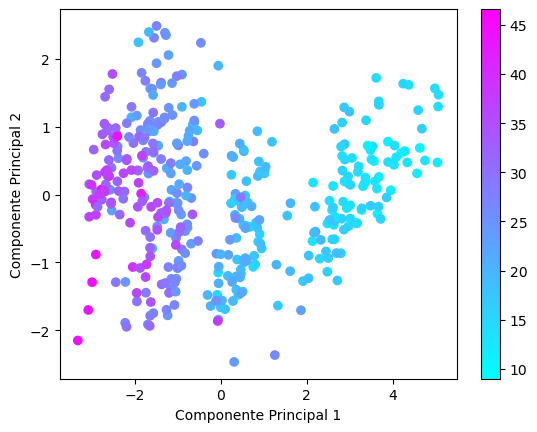

In [17]:
# plota os resultados
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='cool')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [42]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.65886559, 0.13429033])

In [53]:
sum_var_ratio = np.sum(var_ratio)
print(f'A variação total é de {round(sum_var_ratio,4)}, ou seja, as duas primeiras componentes principais explicam cerca de {round(sum_var_ratio*100, 2)}% da variação total dos dados.')

A variação total é de 0.7932, ou seja, as duas primeiras componentes principais explicam cerca de 79.32% da variação total dos dados.


## Referência

GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O'Reilly Media, Inc., 2019. ISBN: 9781492032649. Disponível em: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/. Acesso em: 02 abr. 2023.